In [71]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

## i create a dummy signal  

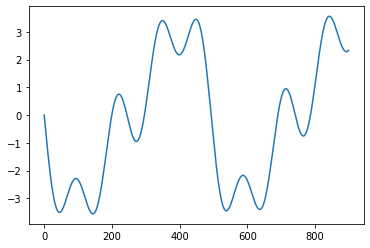

In [72]:
t=np.arange(10000)
omega=2*3.14*2
a=0.1*np.sin(omega*t)
a1=np.sin(omega*t)
b=3*np.sin(2*omega*t)
b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
d=5*np.sin(8*omega*t)
d1=np.sin(8*omega*t)
e=a+b+c+d/4
plt.plot(e[0:900])
z=np.random.uniform(-0.5,0.5,900).reshape(1,900)


In [73]:
m=e[0:900]+z
m.reshape(1,-1)

array([[ 2.26697449e-01,  3.06288002e-01,  4.71153593e-03,
        -5.68420534e-02, -5.62116545e-01, -5.49410680e-01,
        -1.25826443e+00, -7.99272830e-01, -1.15686773e+00,
        -7.36511297e-01, -1.55355415e+00, -1.42717263e+00,
        -1.93220290e+00, -1.41760880e+00, -1.90743777e+00,
        -1.86822693e+00, -2.24827917e+00, -1.53792860e+00,
        -2.46593080e+00, -2.34789793e+00, -2.38483817e+00,
        -2.02580567e+00, -2.20236546e+00, -2.48962091e+00,
        -2.72650744e+00, -2.40228358e+00, -2.85330424e+00,
        -3.07340744e+00, -3.25213286e+00, -2.90959238e+00,
        -2.60026822e+00, -3.16716487e+00, -2.87448156e+00,
        -3.09866239e+00, -3.17320452e+00, -3.19442488e+00,
        -3.78168553e+00, -2.98347447e+00, -3.08312906e+00,
        -3.25994714e+00, -3.47622793e+00, -3.64063320e+00,
        -3.72617185e+00, -3.39600154e+00, -3.61296927e+00,
        -3.57755293e+00, -3.77999395e+00, -3.73659404e+00,
        -3.43399486e+00, -3.60711925e+00, -3.20746948e+0

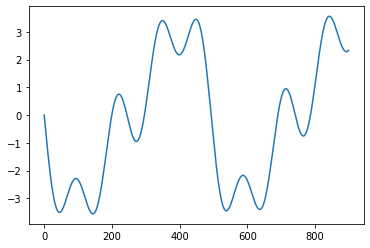

In [74]:

plt.plot(e[0:900])
plt.show()

In [75]:
kk=pd.DataFrame()


In [76]:
kk['a']=a1[0:900]
kk['b']=b1[0:900]
kk['c']=c[0:900]
kk['d']=d1[0:900]
kk['sigint']=m[0:900].reshape(-1,1)

In [77]:
kk.head()

a         b         c         d    sigint
0  0.000000  0.000000  0.000000  0.000000  0.226697
1 -0.006371 -0.012741 -0.025480 -0.050943  0.306288
2 -0.012741 -0.025480 -0.050943 -0.101753  0.004712
3 -0.019111 -0.038214 -0.076373 -0.152300 -0.056842
4 -0.025480 -0.050943 -0.101753 -0.202451 -0.562117

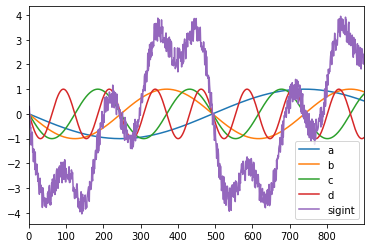

In [78]:
kk.plot()

In [81]:
from sklearn.linear_model import LinearRegression
X=kk[["a","b","c","d"]]
y=kk["sigint"]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9848945703789654

In [82]:
pred=reg.predict(X)

In [83]:
kk["Predicted"]=pred

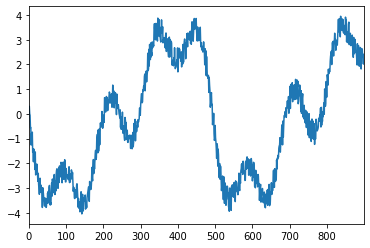

In [84]:
kk["sigint"].plot()

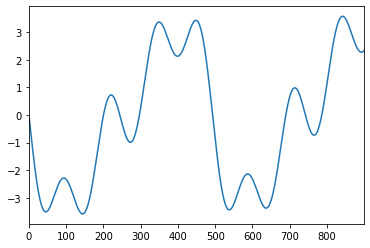

In [85]:
kk["Predicted"].plot()

In [86]:
reg.coef_

array([0.13142489, 2.98521753, 0.994083  , 1.2548184 ])

___What i am trying to do is create a general formula for a sound signal of an instrument for its one note by using collection of sin wave harmonics___
What i have done:
* created a signal using different amplitudes for sinwaves whose frequecies increase in by 2 every time 
* i have used f 2f 4f and 8f sinwaves with varrying amplitude to generate a wave. I add them and divide resultant vector by 4
* Then i add noise to the resultant wave
* so this somehow represents how a real world arbitary sound wave would look

* now i take a table with vectors of each frequency of sinwave 
* i append the input wave to this 

* Apply least squares linear regression to this to calculate the weights

Observations till  now :

* we get a good waveform which is similar to the input waveform

## Most Important Observation here is that the we obtain a general formula for the input noisy wave and can now generate a wave which is perfect with no noise

In [87]:
import scipy.io.wavfile
a,wave=scipy.io.wavfile.read('flute1.wav', mmap=False)
b=44100/1008
b

43.75

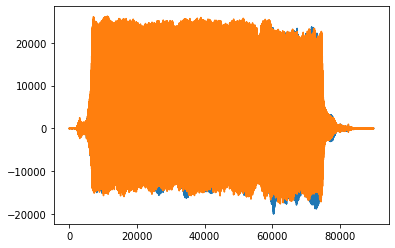

In [88]:
plt.plot(wave)

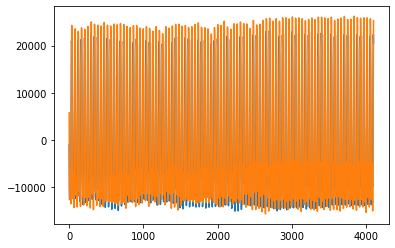

In [89]:
plt.plot(wave[7500:11600])

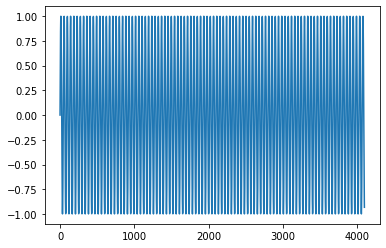

In [184]:
t=np.arange(4100)
omega=2*np.pi/43.75
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(8*omega*t)
e=np.sin(16*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(4*omega*t)
i=np.cos(8*omega*t)
j=np.cos(16*omega*t)
a1=np.sin(32*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(64*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(128*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(32*omega*t)
g1=np.cos(64*omega*t)
h1=np.cos(128*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
n=np.random.uniform(-1,1,4100).reshape(1,4100)

plt.plot(a)


In [185]:
sins=pd.DataFrame()

In [186]:
sins["a"]=a
sins["b"]=b
sins["c"]=c
sins["d"]=d
sins["e"]=e
sins["f"]=f
sins["g"]=g
sins["h"]=h
sins["i"]=i
sins["j"]=j
sins["a1"]=a1
sins["b1"]=b1
sins["c1"]=c1
sins["d1"]=d1
sins["e1"]=e1
sins["f1"]=f1
sins["g1"]=g1
sins["h1"]=h1
sins["i1"]=i1
sins["j1"]=j1
sins["n"]=n.reshape(-1,1)

# sins["signal"]=
signal=wave[7500:11600]
sig = np.array(signal[:, 0]).reshape(-1, 1)
print(sig.shape)
sig=sig

sins["sign"]=sig

(4100, 1)


In [187]:
sins.head()

a         b         c         d         e         f         g  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
1  0.143122  0.283298  0.543384  0.912324  0.747136  0.989705  0.959032   
2  0.283298  0.543384  0.912324  0.747136 -0.993200  0.959032  0.839484   
3  0.417641  0.758947  0.988380 -0.300468  0.573168  0.908612  0.651153   
4  0.543384  0.912324  0.747136 -0.993200  0.231263  0.839484  0.409468   

          h         i         j  ...        c1        d1        e1        f1  \
0  1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000  1.000000   
1  0.839484  0.409468 -0.664672  ... -0.449987  0.961536  0.990950 -0.116423   
2  0.409468 -0.664672 -0.116423  ... -0.803709  0.528227  0.266037 -0.972891   
3 -0.152000 -0.953792  0.819438  ... -0.985493 -0.671351 -0.919528  0.342957   
4 -0.664672 -0.116423 -0.972891  ... -0.956450 -0.897038 -0.512899  0.893035   

         g1        h1        i1        j1         n   sign  
0  1.000000  1.000000  1.000000  1.000000  0.598672   -981  
1 -0.972891  0.893035  0.274679  0.134233 -0.508977  -4611  
2  0.893035  0.595023 -0.849103 -0.963963  0.798995  -7761  
3 -0.764761  0.169718 -0.741139 -0.393025  0.886134 -10268  
4  0.595023 -0.291895  0.441953  0.858449  0.686759 -11933  

[5 rows x 22 columns]

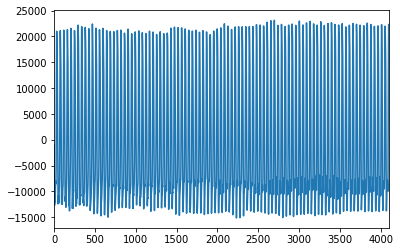

In [188]:
sins["sign"].plot()

In [190]:
from sklearn.linear_model import LinearRegression
X=sins[["a","b","c","d","e","f","g","h","i","j","a1","b1","c1","d1","e1","f1","g1","h1","i1","j1","n"]]
y=sins[["sign"]]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9151748827343985

In [191]:
pred=reg.predict(X)

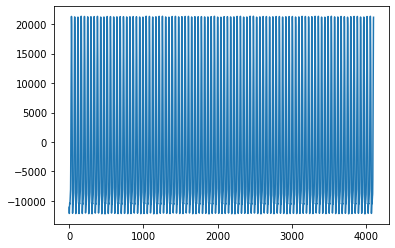

In [192]:
plt.plot(pred)

In [193]:
reg.coef_

array([[-1.52533498e+04,  2.37519269e+03,  3.92338561e+02,
        -2.41032253e-01, -1.80751105e-01, -4.40592856e+03,
        -5.77072337e+03, -8.93664112e+02,  1.12229907e+01,
         8.88218156e-01, -3.00342504e+00,  8.76848039e-03,
        -3.46078352e+01, -5.43114161e-01,  2.29718300e+00,
         1.51818970e+00,  3.54338124e+00,  7.45825585e+00,
         2.94104301e+00,  4.78785131e-01, -4.49004288e+01]])

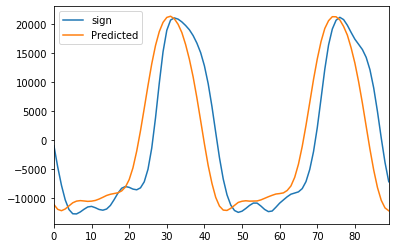

In [194]:
sins["Predicted"]=pred
sins[["sign","Predicted"]][0:90].plot()

In [195]:
a=sins["Predicted"]

In [196]:
zz=44100*3/4100

In [197]:
sigout=np.array(a)
signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout=np.append(sigout,a)
    signalorig=np.append(signalorig,np.array(sins["sign"]))

In [198]:
sigout

array([-11070.51835548, -11892.76210152, -12122.65327714, ...,
        19211.65955897,  20594.36196863,  21162.92665056])

In [199]:
scaledsig = np.int16(sigout/np.max(np.abs(sigout)) * 32767)
scipy.io.wavfile.write("FluteReproduced.wav", 44100, scaledsig)
scipy.io.wavfile.write("Flute.wav", 44100, signalorig)


In [200]:
cof=reg.coef_

In [201]:
t=np.arange(4100)
omega=2*np.pi/100.22
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(3*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(4*omega*t)
e=np.sin(5*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(3*omega*t)
i=np.cos(4*omega*t)
j=np.cos(5*omega*t)
a1=np.sin(6*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(7*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(8*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(6*omega*t)
g1=np.cos(7*omega*t)
h1=np.cos(8*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
sins2=pd.DataFrame()
sins2["a"]=a
sins2["b"]=b
sins2["c"]=c
sins2["d"]=d
sins2["e"]=e
sins2["f"]=f
sins2["g"]=g
sins2["h"]=h
sins2["i"]=i
sins2["j"]=j
sins2["a1"]=a1
sins2["b1"]=b1
sins2["c1"]=c1
sins2["d1"]=d1
sins2["e1"]=e1
sins2["f1"]=f1
sins2["g1"]=g1
sins2["h1"]=h1
sins2["i1"]=i1
sins2["j1"]=j1
sins2["n"]=n.reshape(-1,1)
fsign=sins2*cof
z=fsign.sum(axis = 1, skipna = True) 
z.shape


(4100,)

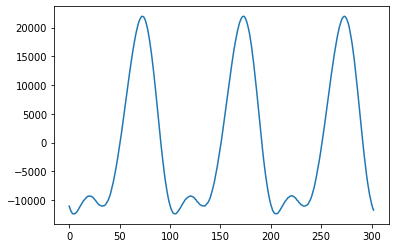

In [203]:
sigout1=np.array(z)
# signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout1=np.append(sigout1,z)
#     signalorig=np.append(signalorig,np.array(sins["sign"]))
plt.plot(z[0:303])
scaledsig1 = np.int16(sigout1/np.max(np.abs(sigout1)) * 32767)
scipy.io.wavfile.write("Flute440.wav", 44100, scaledsig1)
